In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
#import excel file
ecommerce_retail = pd.read_excel(
    r'C:\\Users\\Admin\\Desktop\\DA books\\DA lesson\\Python\\Final_project_RFM\\ecommerce retail.xlsx'
)

In [135]:
#check missing values, data type
print(ecommerce_retail.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [136]:
#Count number of missing values
print("Number of missing values in: ")

print(ecommerce_retail.isna().sum())

Number of missing values in: 
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [137]:
#Remove null valuese in Customer ID
ecommerce_retail= ecommerce_retail.drop(
    ecommerce_retail[ecommerce_retail['CustomerID'].isna()].index, axis = 0
)

In [138]:
#Recheck missing values
print("Number of missing values in: ")

print(ecommerce_retail.isna().sum())

Number of missing values in: 
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [139]:

#change data type
column_list = ['InvoiceNo','StockCode','Description','Country']
for c in column_list:
     ecommerce_retail[c] = ecommerce_retail[c].astype('string')
ecommerce_retail['CustomerID'] = ecommerce_retail['CustomerID'].astype(int) 

#Recheck data type
print(ecommerce_retail.info())

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  string        
 1   StockCode    406829 non-null  string        
 2   Description  406829 non-null  string        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  string        
dtypes: datetime64[ns](1), float64(1), int64(2), string(4)
memory usage: 27.9 MB
None


In [140]:
#check incorrect values, abnormal data, outliers
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)

print(ecommerce_retail.describe())

            Quantity                    InvoiceDate      UnitPrice     CustomerID
count  406829.000000                         406829  406829.000000  406829.000000
mean       12.061303  2011-07-10 16:30:57.879207424       3.460471   15287.690570
min    -80995.000000            2010-12-01 08:26:00       0.000000   12346.000000
25%         2.000000            2011-04-06 15:02:00       1.250000   13953.000000
50%         5.000000            2011-07-31 11:48:00       1.950000   15152.000000
75%        12.000000            2011-10-20 13:06:00       3.750000   16791.000000
max     80995.000000            2011-12-09 12:50:00   38970.000000   18287.000000
std       248.693370                            NaN      69.315162    1713.600303


In [141]:
#check negative values
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)

print(ecommerce_retail[ecommerce_retail['UnitPrice'] < 0])

print(ecommerce_retail[ecommerce_retail['Quantity'] < 0])


Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []
       InvoiceNo StockCode                       Description  Quantity         InvoiceDate  UnitPrice  CustomerID         Country
141      C536379         D                          Discount        -1 2010-12-01 09:41:00      27.50       14527  United Kingdom
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1 2010-12-01 09:49:00       4.65       15311  United Kingdom
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12 2010-12-01 10:24:00       1.65       17548  United Kingdom
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24 2010-12-01 10:24:00       0.29       17548  United Kingdom
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24 2010-12-01 10:24:00       0.29       17548  United Kingdom
...          ...       ...                               ...       ...                 ...    

In [142]:
#Count negative values in UnitPrice and Quantity
print((ecommerce_retail['UnitPrice'] < 0).sum())

print((ecommerce_retail['Quantity'] < 0).sum())


0
8905


In [143]:
#Drop negative values in UnitPrice and Quantity
ecommerce_retail= ecommerce_retail.drop(
    ecommerce_retail[ecommerce_retail['UnitPrice']< 0].index, axis = 0
)

ecommerce_retail= ecommerce_retail.drop(
    ecommerce_retail[ecommerce_retail['Quantity']< 0].index, axis = 0
)


In [144]:
#Recheck negative values
print((ecommerce_retail['UnitPrice'] < 0).sum())

print((ecommerce_retail['Quantity'] < 0).sum())


0
0


In [145]:
#Recheck incorrect values, abnormal data, outliers
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)

print(ecommerce_retail.describe())

            Quantity                    InvoiceDate      UnitPrice     CustomerID
count  397924.000000                         397924  397924.000000  397924.000000
mean       13.021823  2011-07-10 23:43:36.912475648       3.116174   15294.315171
min         1.000000            2010-12-01 08:26:00       0.000000   12346.000000
25%         2.000000            2011-04-07 11:12:00       1.250000   13969.000000
50%         6.000000            2011-07-31 14:39:00       1.950000   15159.000000
75%        12.000000            2011-10-20 14:33:00       3.750000   16795.000000
max     80995.000000            2011-12-09 12:50:00    8142.750000   18287.000000
std       180.420210                            NaN      22.096788    1713.169877


In [146]:
#Recheck negative values in UnitPrice and Quantity
print((ecommerce_retail['UnitPrice'] < 0).sum())
print((ecommerce_retail['Quantity'] < 0).sum())


0
0


In [147]:
#Count number of duplicates
print("Number of duplicates is: " + str(ecommerce_retail.duplicated().sum()))

Number of duplicates is: 5192


In [148]:
#remove duplicates, check duplicates again
ecommerce_retail_removedup = ecommerce_retail.drop_duplicates(
    ["InvoiceNo", "StockCode","InvoiceDate","CustomerID"], keep = 'first'
)

print("Number of duplicates is: " + str(ecommerce_retail_removedup.duplicated().sum()))

pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)

print(ecommerce_retail_removedup)

Number of duplicates is: 0
       InvoiceNo StockCode                          Description  Quantity         InvoiceDate  UnitPrice  CustomerID         Country
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00       2.55       17850  United Kingdom
1         536365     71053                  WHITE METAL LANTERN         6 2010-12-01 08:26:00       3.39       17850  United Kingdom
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00       2.75       17850  United Kingdom
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00       3.39       17850  United Kingdom
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00       3.39       17850  United Kingdom
...          ...       ...                                  ...       ...                 ...        ...         ...             ...
541904    581587     22613          PACK O

In [149]:
#Check number of cancelled Invoice
print("Number of cancel Invoice is: " + str((ecommerce_retail_removedup['InvoiceNo'].str.contains("^C")).sum()))

print(ecommerce_retail_removedup.info())

Number of cancel Invoice is: 0
<class 'pandas.core.frame.DataFrame'>
Index: 387880 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    387880 non-null  string        
 1   StockCode    387880 non-null  string        
 2   Description  387880 non-null  string        
 3   Quantity     387880 non-null  int64         
 4   InvoiceDate  387880 non-null  datetime64[ns]
 5   UnitPrice    387880 non-null  float64       
 6   CustomerID   387880 non-null  int64         
 7   Country      387880 non-null  string        
dtypes: datetime64[ns](1), float64(1), int64(2), string(4)
memory usage: 26.6 MB
None


In [150]:
#date for Recency at 31-12-2011
date_R = dt.datetime(2011,12,31)

#Calculate Revenue
ecommerce_retail_removedup['Total_revenue'] = ecommerce_retail_removedup['Quantity'] * ecommerce_retail_removedup['UnitPrice']

#RFM model
RFM_model = ecommerce_retail_removedup.groupby('CustomerID').agg(
    Recency = ('InvoiceDate', lambda x: (date_R - x.max()).days),
    Frequency = ('InvoiceNo', lambda x: x.count()),
    Monetary = ('Total_revenue', lambda x: x.sum())
).reset_index()

print(RFM_model)
print(RFM_model.info())

      CustomerID  Recency  Frequency  Monetary
0          12346      346          1  77183.60
1          12347       23        182   4310.00
2          12348       96         27   1595.64
3          12349       39         73   1757.55
4          12350      331         17    334.40
...          ...      ...        ...       ...
4334       18280      298         10    180.60
4335       18281      201          7     80.82
4336       18282       28         12    178.05
4337       18283       24        689   1970.28
4338       18287       63         68   1797.68

[4339 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4339 non-null   int64  
 1   Recency     4339 non-null   int64  
 2   Frequency   4339 non-null   int64  
 3   Monetary    4339 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 135.7 KB
None


In [151]:
# rank RFM marks
# RFM_model= RFM_model.sort_values(['Recency', 'Frequency', 'Monetary'], ascending=(True, False, False))
RFM_model['Recency_Score'] = pd.qcut(RFM_model['Recency'], q = 5, labels=[5,4,3,2,1])
RFM_model['Frequency_Score'] = pd.qcut(RFM_model['Frequency'], q = 5, labels=[1,2,3,4,5])
RFM_model['Monetary_Score'] = pd.qcut(RFM_model['Monetary'], q = 5, labels=[1,2,3,4,5])

#Calculate RFM Score
RFM_model['RFM_Score'] = (
    RFM_model['Recency_Score'].astype(str) + RFM_model['Frequency_Score'].astype(str) + RFM_model['Monetary_Score'].astype(str)
)
RFM_model['RFM_Score'] = RFM_model['RFM_Score'].astype(int)

pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)
print(RFM_model)
print(RFM_model.info())

      CustomerID  Recency  Frequency  Monetary Recency_Score Frequency_Score Monetary_Score  RFM_Score
0          12346      346          1  77183.60             1               1              5        115
1          12347       23        182   4310.00             5               5              5        555
2          12348       96         27   1595.64             2               2              4        224
3          12349       39         73   1757.55             4               4              4        444
4          12350      331         17    334.40             1               2              2        122
...          ...      ...        ...       ...           ...             ...            ...        ...
4334       18280      298         10    180.60             1               1              1        111
4335       18281      201          7     80.82             1               1              1        111
4336       18282       28         12    178.05             5             

<Axes: xlabel='Recency'>

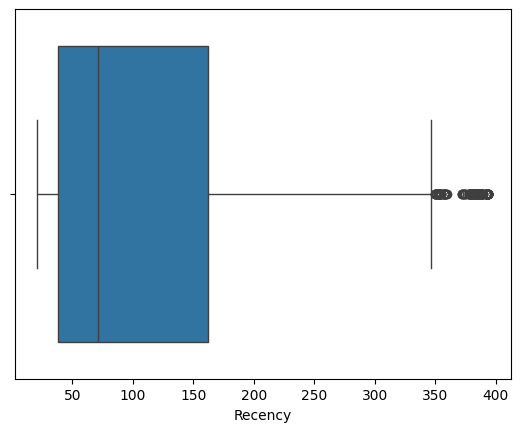

In [152]:
#Check outliers in Recency
sns.boxplot(RFM_model, x = 'Recency')

<Axes: xlabel='Frequency'>

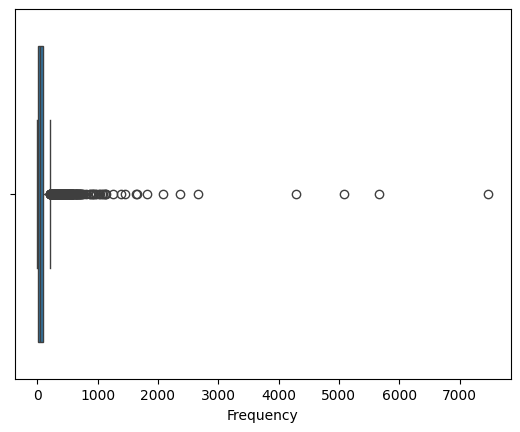

In [153]:
#Check outliers in Frequency
sns.boxplot(RFM_model, x = 'Frequency')

<Axes: xlabel='Monetary'>

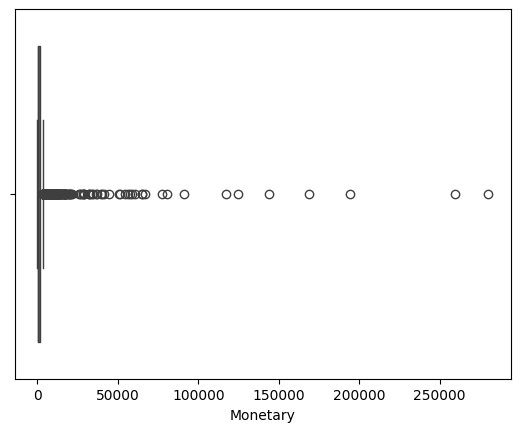

In [154]:
#Check outliers in Monetary
sns.boxplot(RFM_model, x = 'Monetary')

In [155]:
#Setup IQR, upper, lower point for Recency
Seventy_fifth_R = RFM_model['Recency'].quantile(0.75)
Twenty_fifth_R = RFM_model['Recency'].quantile(0.25)
Recency_iqr = Seventy_fifth_R - Twenty_fifth_R
Recency_upper = Seventy_fifth_R + (1.5 * Recency_iqr)
Recency_lower = Twenty_fifth_R - (1.5 * Recency_iqr)

#Setup IQR, upper, lower point for Frequency
Seventy_fifth_F = RFM_model['Frequency'].quantile(0.75)
Twenty_fifth_F = RFM_model['Frequency'].quantile(0.25)
Frequency_iqr = Seventy_fifth_F - Twenty_fifth_F
Frequency_upper = Seventy_fifth_F + (1.5 * Frequency_iqr)
Frequency_lower = Twenty_fifth_F - (1.5 * Frequency_iqr)

#Setup IQR, upper, lower point for Monetary
Seventy_fifth_M = RFM_model['Monetary'].quantile(0.75)
Twenty_fifth_M = RFM_model['Monetary'].quantile(0.25)
Monetary_iqr = Seventy_fifth_M - Twenty_fifth_M
Monetary_upper = Seventy_fifth_M + (1.5 * Monetary_iqr)
Monetary_lower = Twenty_fifth_M - (1.5 * Monetary_iqr)

#Remove Outliers
RFM_model_remove_outliners = RFM_model[
    (RFM_model['Recency'] > Recency_lower) 
          & (RFM_model['Recency'] < Recency_upper)
     & (RFM_model['Frequency'] > Frequency_lower) 
          & (RFM_model['Frequency'] < Frequency_upper)
     & (RFM_model['Monetary'] > Monetary_lower) 
          & (RFM_model['Monetary'] < Monetary_upper)
]

<Axes: xlabel='Recency'>

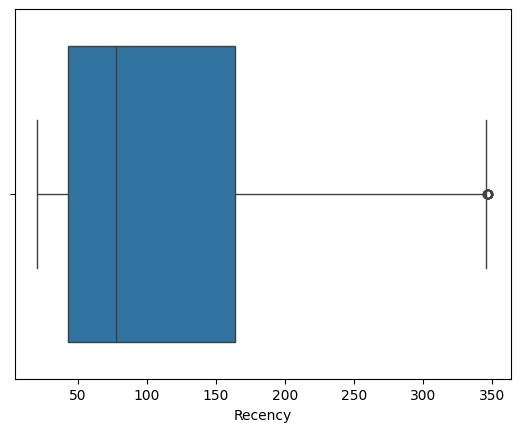

In [156]:
#Recheck outliers in Recency
sns.boxplot(RFM_model_remove_outliners, x = 'Recency')

<Axes: xlabel='Frequency'>

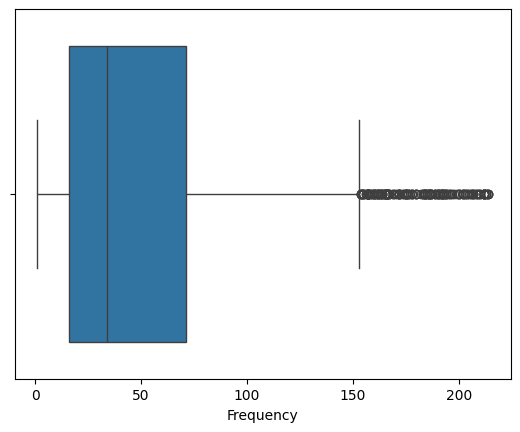

In [157]:
#Recheck outliers in Frequency
sns.boxplot(RFM_model_remove_outliners, x = 'Frequency')

<Axes: xlabel='Monetary'>

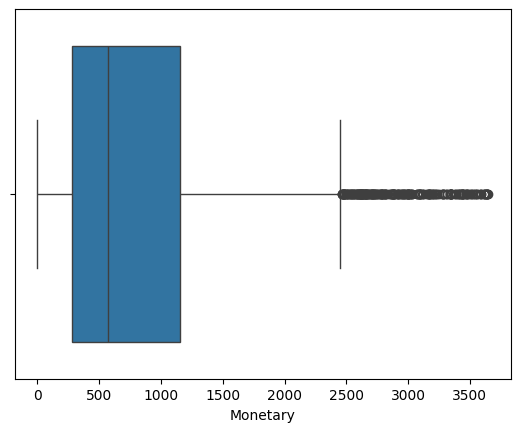

In [158]:
#Recheck outliers in Monetary
sns.boxplot(RFM_model_remove_outliners, x = 'Monetary')

In [159]:
#import excel file, sheet 2
Segmentation = pd.read_excel(
    r'C:\\Users\\Admin\\Desktop\\DA books\\DA lesson\\Python\\Final_project_RFM\\ecommerce retail.xlsx', sheet_name = 'Segmentation'
)
print(Segmentation)

                  Segment                                          RFM Score
0               Champions                  555, 554, 544, 545, 454, 455, 445
1                   Loyal             543, 444, 435, 355, 354, 345, 344, 335
2      Potential Loyalist  553, 551, 552, 541, 542, 533, 532, 531, 452, 4...
3           New Customers                  512, 511, 422, 421, 412, 411, 311
4               Promising  525, 524, 523, 522, 521, 515, 514, 513, 425,42...
5          Need Attention             535, 534, 443, 434, 343, 334, 325, 324
6          About To Sleep             331, 321, 312, 221, 213, 231, 241, 251
7                 At Risk  255, 254, 245, 244, 253, 252, 243, 242, 235, 2...
8        Cannot Lose Them               155, 154, 144, 214,215,115, 114, 113
9   Hibernating customers  332, 322, 233, 232, 223, 222, 132, 123, 122, 2...
10         Lost customers                         111, 112, 121, 131,141,151


In [160]:
# Split values
Segmentation['RFM Score'] = Segmentation['RFM Score'].str.split(',')

Segmentation_sepe = Segmentation.explode('RFM Score').reset_index(drop = True)
Segmentation_sepe.rename(columns= {'RFM Score': 'RFM_Score'}, inplace= True)

Segmentation_sepe['RFM_Score'] = Segmentation_sepe['RFM_Score'].astype(int)

print(Segmentation_sepe)

            Segment  RFM_Score
0         Champions        555
1         Champions        554
2         Champions        544
3         Champions        545
4         Champions        454
..              ...        ...
120  Lost customers        112
121  Lost customers        121
122  Lost customers        131
123  Lost customers        141
124  Lost customers        151

[125 rows x 2 columns]


In [161]:
RFM_Seg = pd.merge(
    RFM_model_remove_outliners, Segmentation_sepe, on= 'RFM_Score', how = 'inner'
)

pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)

print(RFM_Seg)

      CustomerID  Recency  Frequency  Monetary Recency_Score Frequency_Score Monetary_Score  RFM_Score                Segment
0          12348       96         27   1595.64             2               2              4        224                At Risk
1          12349       39         73   1757.55             4               4              4        444                  Loyal
2          12350      331         17    334.40             1               2              2        122  Hibernating customers
3          12352       57         83   2042.24             3               4              4        344                  Loyal
4          12353      225          4     89.00             1               1              1        111         Lost customers
...          ...      ...        ...       ...           ...             ...            ...        ...                    ...
3608       18278       94          9    173.90             2               1              1        211  Hibernating cu

In [162]:
Cus_Seg = RFM_Seg.merge(
    ecommerce_retail_removedup[['CustomerID','Country']], on ='CustomerID', how = 'inner'
)
Cus_Seg = Cus_Seg.drop_duplicates()
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)

print(Cus_Seg)

        CustomerID  Recency  Frequency  Monetary Recency_Score Frequency_Score Monetary_Score  RFM_Score                Segment         Country
0            12348       96         27   1595.64             2               2              4        224                At Risk         Finland
27           12349       39         73   1757.55             4               4              4        444                  Loyal           Italy
100          12350      331         17    334.40             1               2              2        122  Hibernating customers          Norway
117          12352       57         83   2042.24             3               4              4        344                  Loyal          Norway
200          12353      225          4     89.00             1               1              1        111         Lost customers         Bahrain
...            ...      ...        ...       ...           ...             ...            ...        ...                    ...         

In [163]:
#Customer Segmentations
Customer_Segment = Cus_Seg['Segment'].value_counts().reset_index(name= 'Number_of_Cus')
total_customers = Customer_Segment['Number_of_Cus'].sum()
Customer_Segment['Percentage'] = (Customer_Segment['Number_of_Cus'] / total_customers) * 100.0
Customer_Segment['Percentage'] = Customer_Segment['Percentage'].round(2)

print(Customer_Segment)

                  Segment  Number_of_Cus  Percentage
0   Hibernating customers            782       21.61
1      Potential Loyalist            508       14.04
2                 At Risk            373       10.31
3               Champions            355        9.81
4                   Loyal            349        9.64
5          Lost customers            327        9.04
6           New Customers            307        8.48
7          Need Attention            223        6.16
8          About To Sleep            196        5.42
9               Promising            126        3.48
10       Cannot Lose Them             73        2.02
                  Segment  Number_of_Cus  Percentage
0   Hibernating customers            782       21.61
1      Potential Loyalist            508       14.04
2                 At Risk            373       10.31
3               Champions            355        9.81
4                   Loyal            349        9.64
5          Lost customers            327      

In [164]:
#Customer Segmentation treemap  
import plotly.express as px

fig = px.treemap(
    Customer_Segment, 
    path = ['Segment'], values = 'Percentage',
    title = '% Distribution of Customer by Segmentation'
)

fig.update_traces(textinfo='label+value')
fig.update_layout(margin = dict(t = 50,l = 25, r = 30, b = 20))
fig.update_traces(texttemplate='%{label}<br>%{value}%')

fig.show()

In [165]:
category = RFM_Seg[["Segment","Recency","Frequency", "Monetary"]].groupby('Segment').agg(["mean", "min", "max"])

pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)

print(category)

                          Recency             Frequency              Monetary                 
                             mean  min  max        mean min  max         mean     min      max
Segment                                                                                       
About To Sleep         107.908163   54  198   21.816327   1   79   278.656735   36.56   877.44
At Risk                169.556452   93  347   71.645161  14  214  1255.806452  254.71  3638.41
Cannot Lose Them       226.438356   94  339   48.301370   1  191  1386.973986  516.42  3619.22
Champions               32.748588   21   53  124.542373  58  214  2112.696723  926.03  3649.10
Hibernating customers  162.859155   54  343   23.140845   1   57   400.558785   13.30   925.35
Lost customers         274.801223  201  347   11.480122   1   71   173.182936    3.75   463.95
Loyal                   57.268012   22   92   95.504323  31  209  1690.882305  497.98  3627.77
Need Attention          53.644144   21   92   57.4

# As can be seen from the chart to analyse current company'state
# -Hibernating Customers occupy the highest density in this plot (21.61%), followed by the number of customer who are Potential Loyalist (14.04%), showing a potential chance for growth of company in loyal segment. While Loyay Customers, New Customers and Champions share nearly similar proportion (about 9.64%, 8.48% and 9.81% respectively), this group is important for enhancing the company'sustainability and growth. In contrast the number of At Risk customers have a quite high density (about 10.31%).

# -Although the number of valuable customers, including potential, loyal and new customers help for steady growth , we need to pay attention on At Risk and Need Attention Customer for posing some approriate stategies to prevent increasing churn rate.

# -Potential Loyalist have high frequency (mean at 59) while have the low recency(mean at 49) =>  paying attention for converting them a loyal customer could be a priority . Besides, Hibernating still be at high rate, frequency (mean at 23) , Recency (nearly 162) indicate that they used to be a loyal or valuable customers but recently they have no any transaction => be focus on.

# => Current state of company still be sustainable, the rate of valuable customers occupy at high density to ensure the growth of company, while the number of At risk customers show a high proportion that could lead to increasing churn rate, followed by other group such as need attention or hibernating customer , having negative effect for trustworthy of company 


# #Suggest for Marketing and Sales team retail model, should we focus on R, F or M metric in RFM model:
# For retail company, R and F should be prioritized as key metrics for them. These metris provide insights how recently customers have returned and  how often they buy in order to have appropriate campaigns for company.

# Firstly, for Potential Loyalist, we can see that they have high frequency over long-term period with low recency , we should make a survey for evaluating their satisfaction, give more promotion code, discount voucher with free shipping fee to increase their loyalness, encourage them to buy more products for converting them loyal customers.

# Secondly, for At Risk Customers, we need to analyse several reasons that lead to churness or being less active. Then,  proposing promotion program or customer appprciation with buy one get one event in order to engage them.

# Thirdly, Hibernating customers had high frequency  long-term period in the past, but recently they have no activity. We should have customer apppreciation program for welcoming back, promotion code ,reactivation discount and reviewing customer care , special gifts in special days like New Year or Christmas day for getting customers back.